In [10]:
from playwright.async_api import async_playwright
playwright = await async_playwright().start()


In [40]:
from bs4 import BeautifulSoup, SoupStrainer
from tqdm import tqdm

In [2]:
browser = await playwright.chromium.launch(headless = True)
page = await browser.new_page()

In [3]:
keyword = '2020 Volkswagen Polo 1.6L Comfortline'

In [27]:
url = f'https://www.google.com/search?q={keyword}&tbm=isch'
await page.goto(url)

<Response url='https://www.google.com/search?q=2020+Volkswagen+Polo+1.6L+Comfortline&udm=2' request=<Request url='https://www.google.com/search?q=2020+Volkswagen+Polo+1.6L+Comfortline&udm=2' method='GET'>>

In [35]:
import asyncio

In [36]:
await asyncio.sleep(1)

In [33]:
r = await page.screenshot(path=f'{keyword}.png')

In [89]:
await page.evaluate("""
    () => document.documentElement.scrollHeight
""")

44172

In [26]:
r = page.locator('xpath=//*[@id="islrg"]/div[1]/div[1]')

In [88]:
await page.mouse.wheel(0, 15000)

In [29]:
html = await page.content()

In [5]:
img_elements = await page.query_selector_all('a')
img_elements = [i for i in img_elements if (await i.get_attribute('jsname')) == 'VIftV']

In [ ]:
await img_elements[0].inner_html()

In [24]:
await page.keyboard.down('End')

In [6]:
await img_elements[0].click()

In [ ]:
await page.click(img_elements[i])

In [ ]:
for i in range(len(img_elements)):
    await img_elements[i].click()

In [ ]:
img_elements

In [ ]:
dir(img_elements[0])

In [ ]:
rs = [] 
for i in img_elements:
    h = await i.inner_html()
    j = await i.get_attribute('jsname')
    rs.append((h, j))

In [ ]:
[i for i in rs if '<img' in i[0]]

In [ ]:
await i.inner_html()

In [43]:
img_elements[i]

<bound method ElementHandle.click of <JSHandle preview=JSHandle@<h3>…</h3>>>

In [41]:
img_elements = await page.query_selector_all('h3')
for i in tqdm(range(len(img_elements))):
    await img_elements[i].click(timeout = 2000)

100%|█████████▉| 201/202 [01:15<00:00,  2.65it/s]


TimeoutError: Timeout 30000ms exceeded.

In [44]:
html = await page.content()

In [45]:
soup = BeautifulSoup(html, 'html.parser')

In [53]:
image_segment = SoupStrainer('div', {'role': 'list'})
soup = BeautifulSoup(html, 'html.parser')

In [98]:
image_list = []
for image in soup.find_all('h3'):
    img = image.find('img')
    if img is not None:
        href = image.find('a').get('href')
        if href is None:
            continue
        alt_text = img.attrs['alt']
        d = {
            'alt_text': alt_text,
            'parent_href': href,
        }
        if img.attrs['src'].startswith('data:image'):
            d['image_base64'] = img.attrs['src']
        else:
            d['image_url'] = img.attrs['src']
        image_list.append(d)

In [101]:
urllib.parse.unquote(q)

'/imgres?q=2020 Volkswagen Polo 1.6L Comfortline&imgurl=https://qph.cf2.quoracdn.net/main-qimg-4a87bec29b9ebacdcdf9ebb52bd27836-lq&imgrefurl=https://www.quora.com/How-do-I-identify-Volkswagen-Polo-variants-from-external-looks&docid=W40e8f9J0XhqTM&tbnid=Ky4BPUCpa_oAQM&vet=12ahUKEwjtyY6Cgb-FAxWZEVkFHWpLA2c4HhAzegQIAhAA..i&w=458&h=321&hcb=2&ved=2ahUKEwjtyY6Cgb-FAxWZEVkFHWpLA2c4HhAzegQIAhAA'

In [100]:
q

'/imgres?q=2020%20Volkswagen%20Polo%201.6L%20Comfortline&imgurl=https%3A%2F%2Fqph.cf2.quoracdn.net%2Fmain-qimg-4a87bec29b9ebacdcdf9ebb52bd27836-lq&imgrefurl=https%3A%2F%2Fwww.quora.com%2FHow-do-I-identify-Volkswagen-Polo-variants-from-external-looks&docid=W40e8f9J0XhqTM&tbnid=Ky4BPUCpa_oAQM&vet=12ahUKEwjtyY6Cgb-FAxWZEVkFHWpLA2c4HhAzegQIAhAA..i&w=458&h=321&hcb=2&ved=2ahUKEwjtyY6Cgb-FAxWZEVkFHWpLA2c4HhAzegQIAhAA'

In [102]:
for i in image_list:
    q = i['parent_href']
    
    url = urllib.parse.unquote(q.split('imgurl=')[1].split('&')[0])
    print(url)

https://images.wapcar.my/file1/a8c5626135a946e78613a7a6b6c56432_1125x630.jpg
https://i.ytimg.com/vi/Z-Ggppk8YKg/maxresdefault.jpg?sqp=-oaymwEmCIAKENAF8quKqQMa8AEB-AHUBoAC4AOKAgwIABABGGUgZShlMA8=&rs=AOn4CLCwb0AUGofv3aAUfZwCxkawv0PCRg
https://i.ytimg.com/vi/1ll0bSErFY0/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCIh-QGg0j2sUrVNIvAPbkIYlmm4w
https://www.carfolio.com/images/dbimages/zgas/models/id/58491/2015%20volkswagen%20polo%20sedan%20front%20%C2%BE.jpg
https://www.mulsons.co.za/wp-content/uploads/2023/11/2020-Volkswagen-Polo-GP-16-Comfortline-Auto.jpg
https://images.wapcar.my/file1/68e00f74f9f24e3da331666758305abf_678x380.jpg
https://i.ytimg.com/vi/g_OADzIq_6g/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLCthWWP5SrxcTb-DUc7O-RwlFaGdg
https://i.ytimg.com/vi/J3a2Zh4N3Ro/hq720.jpg?sqp=-oaymwEhCK4FEIIDSFryq4qpAxMIARUAAAAAGAElAADIQj0AgKJD&rs=AOn4CLDRVep2I2AAzdXXPV0icGaQmjYZRA
https://upload.wikimedia.org/wikipedia/commons/9/91/VW

In [103]:
from PIL import Image
import requests

image = Image.open(requests.get(url, stream=True, timeout = 20).raw)

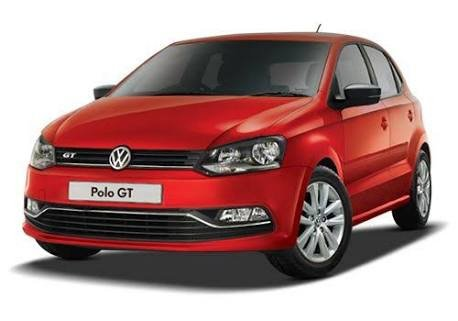

In [104]:
image